## Credits

All credits to:
- https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
- https://nipunbatra.github.io/blog/ml/2019/08/20/Gaussian-Processes.html

## Plot of bivariate/2D Gaussian in 3D Space (PDF)  

In [8]:
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [9]:
def make_pdf_2d_gaussian(mu, sigma):
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)



    # Create a surface plot and projected filled contour plot under it.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.Greys)
    
    ax.set_xlabel(r"$X_1$")
    ax.set_ylabel(r"$X_2$")
    ax.set_zlabel("PDF")

    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.Greys)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.25)
    ax.set_zticks(np.linspace(0,0.2,5))
    ax.view_init(27, -15)
    ax.set_title(f'$\mu$ = {mu}\n $\Sigma$ = {sigma}')

/tmp/ipykernel_10375/4265074062.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


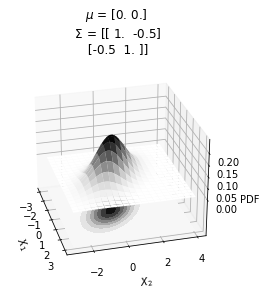

In [12]:
mu = np.array([0., 0.])
sigma = np.array([[ 1. , -0.5], [-0.5,  1]])

make_pdf_2d_gaussian(mu, sigma)